<a href="https://colab.research.google.com/github/purnima2581/bitcoin/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                      ds       trend  ...  multiplicative_terms_upper        yhat
0    2021-05-10 09:15:00  366.494262  ...                         0.0  360.938434
1    2021-05-10 09:30:00  366.494743  ...                         0.0  360.905305
2    2021-05-10 09:45:00  366.495224  ...                         0.0  360.947709
3    2021-05-10 10:00:00  366.495705  ...                         0.0  361.032417
4    2021-05-10 10:15:00  366.496187  ...                         0.0  361.134663
..                   ...         ...  ...                         ...         ...
922  2021-06-29 12:15:00  431.953249  ...                         0.0  429.756564
923  2021-06-29 12:30:00  431.970961  ...                         0.0  429.846295
924  2021-06-29 12:45:00  431.988672  ...                         0.0  429.969551
925  2021-06-29 13:00:00  432.006383  ...                         0.0  430.119343
926  2021-06-29 13:15:00  432.024094  ...                         0.0  430.284925

[927 rows x 19 

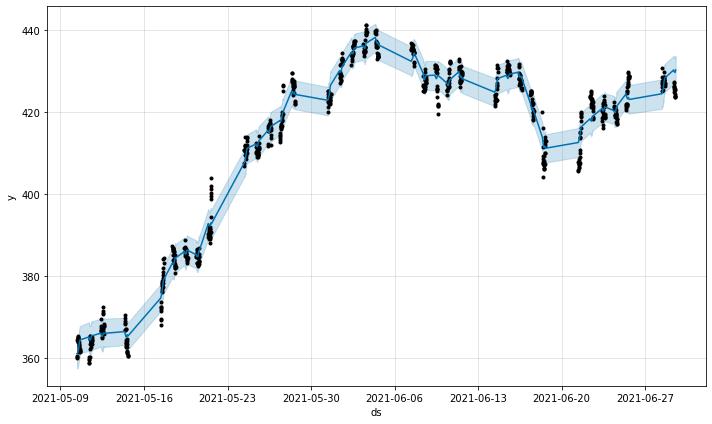

In [ ]:
import pandas as pd
from datetime import datetime as dt
import datetime
from datetime import timedelta
import time
import requests
import json
import matplotlib.pyplot as plt
import fbprophet
from fbprophet import Prophet
#import pmdarima as pm
#from pmdarima.model_selection import train_test_split

def gethistdata(Scrip_code):
  now = dt.now()
  now.strftime("%Y-%m-%d")
  today = int(now.timestamp())
  yesterday = dt.now() - datetime.timedelta(days = 52)
  yesterday.strftime("%m%d%y")
  yesterdaytimestamp = int(yesterday.timestamp())
  URL = 'https://tvc4.forexpros.com/3ddad4c777c7707f6004830b88366855/1620635769/1/1/8/history?symbol={2}&resolution=15&from={0}&to={1} '.format(yesterdaytimestamp, today,Scrip_code)
  #print(URL)
  df = pd.read_json((URL))  
  df2 = df.rename({'t': 'ds','c': 'y', 'o': 'Open','h': 'High','l': 'Low'}, axis='columns')
  df2["ds"] = pd.to_datetime(df2["ds"], unit='s') + timedelta(hours=5,minutes=30)
  # print(df2.tail(2))
  #df2.to_csv('data.csv',index=False )
  return df2

def prophet(Scrip_code):
  data = pd.DataFrame.from_dict(gethistdata(Scrip_code))
  model = Prophet(daily_seasonality=True)
  model.fit(data)

  future = model.make_future_dataframe(periods = 3,freq='15min')
  pred = model.predict(future)
  model.plot(pred)
  data= pred
  data.to_csv('data.csv',index=False )

  return pred['yhat']

prophet(18376)
df3 = pd.read_csv('data.csv')
print(df3)
